Loading the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
df_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4nwin_nm_blncd.csv")

In [3]:
df_0.head()

,prov_char,country_char,wavenumber,649.893,650.376,650.858,651.34,651.822,652.304,652.786,...,3998.194,3998.676,3999.158,3999.64,4000.122,tgp_name,dgp_name,fgp_name,country_name,thnoth_name
0,KTX,ID,ID-KTX-068-2306-010_002,0.009999,0.010936,0.012060,0.013193,0.014161,0.014829,0.015131,...,-0.000237,-0.000224,-0.000193,-0.000141,-0.000068,Group 3,Group 2,Group 4,Indonesia,Non-Thai
1,KBX,ID,ID-KBX-068-2307-015_002_adah2opik,0.011787,0.012684,0.013509,0.014131,0.014446,0.014396,0.013982,...,0.000856,0.000782,0.000682,0.000577,0.000490,Group 3,Group 2,Group 4,Indonesia,Non-Thai
2,SUX,ID,ID-SUX-073-2311-001_005,0.018855,0.018050,0.017008,0.015901,0.014902,0.014138,0.013663,...,0.000310,0.000339,0.000396,0.000478,0.000577,Group 3,Group 2,Group 3,Indonesia,Non-Thai
3,KTX,ID,ID-KTX-068-2306-002_005,0.013460,0.013085,0.013149,0.013695,0.014654,0.015859,0.017094,...,-0.000523,-0.000566,-0.000579,-0.000557,-0.000494,Group 3,Group 2,Group 4,Indonesia,Non-Thai
4,KTX,ID,ID-KTX-068-2308-035_004,0.011486,0.011184,0.010776,0.010319,0.009914,0.009674,0.009681,...,-0.002519,-0.002572,-0.002616,-0.002649,-0.002678,Group 3,Group 2,Group 4,Indonesia,Non-Thai


Selecting Regions of Interest

In [4]:
# Define the regions of interest
regions_of_interest = [
    (2986, 3026), (2933, 2973), (2902, 2942), (2833, 2873),
    (1480, 2020), (1445, 1485), (1398, 1438), (1358, 1398),
    (1215, 1255), (1140, 1180), (1096, 1136), (1078, 1118),
    (1000, 910), (702, 742)
]

# Extract columns corresponding to the regions of interest
columns_to_focus = []
for start, end in regions_of_interest:
    columns_to_focus.extend([col for col in df_0.columns[4:-5] if start <= float(col) <= end])

# Create a new DataFrame with the selected regions
df_0_selected_regions = df_0[columns_to_focus]

# Combine the selected regions with the target column and other relevant columns
df_0_selected_regions = pd.concat([df_0[['fgp_name', 'prov_char']], df_0_selected_regions], axis=1)

# Save the DataFrame for further processing
#df_0_selected_regions.to_csv('data/data file 2/data_1.csv', index=False)


In [5]:
df_0_selected_regions = pd.read_csv('data/data file 2/data_1.csv')
df_baseline_corrected = pd.read_csv('data/data file 2/data_1_bslcrct.csv')
df_smoothed = pd.read_csv('data/data file 2/data_1_smoothed.csv')
df_normalized = pd.read_csv('data/data file 2/data_1_normalized.csv')
df_1st_derivative = pd.read_csv('data/data file 2/data_1_1_der.csv')
df_2nd_derivative = pd.read_csv('data/data file 2/data_1_2_der.csv')
df_1_der_savgol = pd.read_csv('data/data file 2/data_1_1_der_savgol.csv')
df_2_der_savgol = pd.read_csv('data/data file 2/data_1_2_der_savgol.csv')
df_snv = pd.read_csv('data/data file 2/data_1_snv.csv')
df_rnv = pd.read_csv('data/data file 2/data_1_rnv.csv')

Step-by-Step Implementation for RandomForest Classifier with Hyperparameter Tuning

Load the Smoothed Dataset

In [6]:
# Load the smoothed dataset
df_norm_v0w = pd.read_csv('data/data file 2/data_1_2_der.csv')

In [7]:
df_norm_v0w

,fgp_name,prov_char,2986.231,2986.713,2987.195,2987.677,2988.159,2988.641,2989.124,2989.606,...,737.639,738.121,738.603,739.085,739.567,740.049,740.531,741.013,741.496,741.978
0,Group 1,CBI,-0.000067,0.000283,0.001444,0.003113,0.004655,0.005587,0.005527,0.004423,...,0.021211,-0.009336,-0.006345,-0.001138,0.019346,0.044264,0.025583,-0.009819,-0.014560,-0.008608
1,Group 1,CBI,0.000094,0.000266,0.000611,0.000821,0.000760,0.000470,0.000094,-0.000195,...,0.018663,-0.012410,-0.010093,-0.005036,0.011206,0.032039,0.014379,-0.018172,-0.019745,-0.011606
2,Group 1,CBI,0.000363,0.000675,0.001081,0.000937,0.000199,-0.000853,-0.001766,-0.002131,...,0.011283,-0.017478,-0.012652,-0.004249,0.010099,0.027986,0.011474,-0.018981,-0.020140,-0.011880
3,Group 1,CBI,-0.000129,-0.000192,-0.000298,-0.000480,-0.000809,-0.001151,-0.001323,-0.001198,...,-0.004836,-0.028924,-0.018995,-0.004532,0.014071,0.037270,0.023513,-0.008753,-0.014113,-0.008308
4,Group 1,CBI,0.000470,0.000746,0.000929,0.000386,-0.000737,-0.002003,-0.002835,-0.002810,...,-0.014726,-0.035566,-0.022456,-0.004110,0.015486,0.040217,0.030072,-0.000133,-0.007942,-0.004515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Group 4,KTX,-0.000163,-0.000035,0.000512,0.001309,0.001948,0.002256,0.002078,0.001363,...,0.011123,-0.013209,-0.003718,0.010240,0.021752,0.029141,0.005174,-0.030950,-0.033992,-0.023454
180,Group 4,KBX,-0.000655,-0.000807,-0.000610,0.000100,0.000809,0.001406,0.001701,0.001532,...,0.001097,-0.020861,-0.010491,0.004730,0.018710,0.033363,0.015402,-0.018032,-0.022639,-0.014907
181,Group 4,RNG,0.001057,0.001447,0.001389,0.000229,-0.001206,-0.002338,-0.002686,-0.002142,...,-0.012311,-0.030937,-0.016132,0.003926,0.022716,0.043199,0.029755,-0.002975,-0.012426,-0.008764
182,Group 4,KTX,0.002393,0.003468,0.003994,0.002343,-0.000113,-0.002562,-0.004109,-0.004239,...,-0.008203,-0.027907,-0.015855,0.001272,0.023208,0.051023,0.040923,0.008690,-0.002790,-0.001856


In [8]:
df_norm_v0w.head()

,fgp_name,prov_char,2986.231,2986.713,2987.195,2987.677,2988.159,2988.641,2989.124,2989.606,...,737.639,738.121,738.603,739.085,739.567,740.049,740.531,741.013,741.496,741.978
0,Group 1,CBI,-0.000067,0.000283,0.001444,0.003113,0.004655,0.005587,0.005527,0.004423,...,0.021211,-0.009336,-0.006345,-0.001138,0.019346,0.044264,0.025583,-0.009819,-0.014560,-0.008608
1,Group 1,CBI,0.000094,0.000266,0.000611,0.000821,0.000760,0.000470,0.000094,-0.000195,...,0.018663,-0.012410,-0.010093,-0.005036,0.011206,0.032039,0.014379,-0.018172,-0.019745,-0.011606
2,Group 1,CBI,0.000363,0.000675,0.001081,0.000937,0.000199,-0.000853,-0.001766,-0.002131,...,0.011283,-0.017478,-0.012652,-0.004249,0.010099,0.027986,0.011474,-0.018981,-0.020140,-0.011880
3,Group 1,CBI,-0.000129,-0.000192,-0.000298,-0.000480,-0.000809,-0.001151,-0.001323,-0.001198,...,-0.004836,-0.028924,-0.018995,-0.004532,0.014071,0.037270,0.023513,-0.008753,-0.014113,-0.008308
4,Group 1,CBI,0.000470,0.000746,0.000929,0.000386,-0.000737,-0.002003,-0.002835,-0.002810,...,-0.014726,-0.035566,-0.022456,-0.004110,0.015486,0.040217,0.030072,-0.000133,-0.007942,-0.004515


Define the Target Variable and Features

In [9]:
# Define the target_v0w variable and feature columns
target_v0w = 'fgp_name'
features_v0w = df_norm_v0w.columns.difference(['fgp_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

RandomForest Classification and Evaluation with LOGO-CV

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the RandomForest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies = []
y_true_all = []
y_pred_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = rf.predict(X_test)
    
    # Calculate and store test accuracies
    accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_accuracy = np.mean(accuracies)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV RandomForest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.5090278934028934
Leave-One-Group-Out CV RandomForest Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.46      0.41      0.44        46
     Group 2       0.67      0.57      0.61        46
     Group 3       0.38      0.50      0.43        46
     Group 4       0.40      0.37      0.38        46

    accuracy                           0.46       184
   macro avg       0.48      0.46      0.47       184
weighted avg       0.48      0.46      0.47       184

Confusion Matrix:
         Group 1  Group 2  Group 3  Group 4
Group 1       19        6       11       10
Group 2        3       26       12        5
Group 3        7        5       23       11
Group 4       12        2       15       17
Class: Group 1
precision: 0.4634146341463415
recall: 0.41304347826086957
f1-score: 0.4367816091954023
support: 46.0

Class: Group 2
precision: 0.6666666666666666
recall: 0.5652173913043478
f1-scor

Implementing Different Classifiers on the Smoothed Dataset

In [11]:
import pandas as pd

# Define the target variable and feature columns
target_v0w = 'fgp_name'
features_v0w = df_norm_v0w.columns.difference(['fgp_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


Define the Evaluation Function

In [12]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

def classify_and_evaluate_logo_cv(model, X, y, groups, class_labels):
    # Initialize LOGO-CV
    logo = LeaveOneGroupOut()

    # Initialize lists to store results
    accuracies = []
    y_true_all = []
    y_pred_all = []

    # Perform LOGO-CV
    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Predict the test samples
        y_test_pred = model.predict(X_test)

        # Calculate and store test accuracies
        accuracies.append(accuracy_score(y_test, y_test_pred))

        # Store the prediction and actual value
        y_true_all.extend(y_test)
        y_pred_all.extend(y_test_pred)

    # Calculate average accuracies
    avg_accuracy = np.mean(accuracies)

    print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

    # Generate the classification report for the overall test predictions
    report_logo = classification_report(y_true_all, y_pred_all, target_names=class_labels, output_dict=True)
    print(f"Leave-One-Group-Out CV {model.__class__.__name__} Classification Report")
    print(classification_report(y_true_all, y_pred_all, target_names=class_labels))

    # Print the confusion matrix in text format
    conf_matrix = confusion_matrix(y_true_all, y_pred_all)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print("Confusion Matrix:")
    print(conf_matrix_df)

    # Print the detailed results
    for class_name, metrics in report_logo.items():
        if isinstance(metrics, dict):
            print(f"Class: {class_name}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{class_name}: {metrics}")
        print()


Implement and Evaluate Each Classifier

Support Vector Machine (SVM)

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the target variable and feature columns
target_v0w = 'fgp_name'
features_v0w = df_norm_v0w.columns.difference(['fgp_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier with different kernel
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies = []
y_true_all = []
y_pred_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Calculate and store test accuracies
    accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_accuracy = np.mean(accuracies)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

# Generate the classification report for the overall test predictions
report_svm_logo = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_svm_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

# Calculate the overall accuracy from the classification report
overall_accuracy_report = report_svm_logo['accuracy']
print(f'Overall Accuracy from Classification Report: {overall_accuracy_report}')

# Compare the accuracies
if np.isclose(avg_accuracy, overall_accuracy_report):
    print("The average test accuracy and overall accuracy from the classification report match.")
else:
    print("There is a discrepancy between the average test accuracy and overall accuracy from the classification report.")


Leave-One-Group-Out CV - Average Test Accuracy: 0.5817681161431162
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.75      0.39      0.51        46
     Group 2       0.75      0.59      0.66        46
     Group 3       0.41      0.76      0.53        46
     Group 4       0.44      0.37      0.40        46

    accuracy                           0.53       184
   macro avg       0.59      0.53      0.53       184
weighted avg       0.59      0.53      0.53       184

Confusion Matrix:
         Group 1  Group 2  Group 3  Group 4
Group 1       18        6       13        9
Group 2        2       27       11        6
Group 3        1        3       35        7
Group 4        3        0       26       17
Class: Group 1
precision: 0.75
recall: 0.391304347826087
f1-score: 0.5142857142857142
support: 46.0

Class: Group 2
precision: 0.75
recall: 0.5869565217391305
f1-score: 0.6585365853658537
support: 46.0

Cl

In [14]:
# Define the target variable and feature columns
target_v0w = 'fgp_name'
features_v0w = df_norm_v0w.columns.difference(['fgp_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_svm2_all = []
y_pred_svm2_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Store the prediction and actual value
    y_true_svm2_all.extend(y_test)
    y_pred_svm2_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_svm2_all, y_pred_svm2_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_svm1_logo = classification_report(y_true_svm2_all, y_pred_svm2_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_svm2_all, y_pred_svm2_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_svm2_all, y_pred_svm2_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_svm1_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.5271739130434783
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.75      0.39      0.51        46
     Group 2       0.75      0.59      0.66        46
     Group 3       0.41      0.76      0.53        46
     Group 4       0.44      0.37      0.40        46

    accuracy                           0.53       184
   macro avg       0.59      0.53      0.53       184
weighted avg       0.59      0.53      0.53       184

Confusion Matrix:
         Group 1  Group 2  Group 3  Group 4
Group 1       18        6       13        9
Group 2        2       27       11        6
Group 3        1        3       35        7
Group 4        3        0       26       17
Class: Group 1
precision: 0.75
recall: 0.391304347826087
f1-score: 0.5142857142857142
support: 46.0

Class: Group 2
precision: 0.75
recall: 0.5869565217391305
f1-score: 0.6585365853658537
support: 46.0

Cl

Random Forest (RF) classifier

In [15]:
# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_rf2_all = []
y_pred_rf2_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = rf.predict(X_test)
    
    # Store the prediction and actual value
    y_true_rf2_all.extend(y_test)
    y_pred_rf2_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_rf2_all, y_pred_rf2_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_rf2_all, y_pred_rf2_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Random Forest Model Classification Report")
print(classification_report(y_true_rf2_all, y_pred_rf2_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_rf2_all, y_pred_rf2_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.46195652173913043
Leave-One-Group-Out CV Random Forest Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.46      0.41      0.44        46
     Group 2       0.67      0.57      0.61        46
     Group 3       0.38      0.50      0.43        46
     Group 4       0.40      0.37      0.38        46

    accuracy                           0.46       184
   macro avg       0.48      0.46      0.47       184
weighted avg       0.48      0.46      0.47       184

Confusion Matrix:
         Group 1  Group 2  Group 3  Group 4
Group 1       19        6       11       10
Group 2        3       26       12        5
Group 3        7        5       23       11
Group 4       12        2       15       17
Class: Group 1
precision: 0.4634146341463415
recall: 0.41304347826086957
f1-score: 0.4367816091954023
support: 46.0

Class: Group 2
precision: 0.6666666666666666
recall: 0.5652173913043478
f1-sc

Extra Trees (ET) classifier

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Define the target variable and feature columns
target_v0u = 'fgp_name'
features_v0u = df_norm_v0w.columns.difference(['fgp_name', 'prov_char'])
X = df_norm_v0w[features_v0u]
y = df_norm_v0w[target_v0u]
groups = df_norm_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the Extra Trees classifier
et = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_et_all = []
y_pred_et_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    et.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = et.predict(X_test)
    
    # Store the prediction and actual value
    y_true_et_all.extend(y_test)
    y_pred_et_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_et_all, y_pred_et_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_et_logo = classification_report(y_true_et_all, y_pred_et_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Extra Trees Model Classification Report")
print(classification_report(y_true_et_all, y_pred_et_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_et_all, y_pred_et_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_et_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.532608695652174
Leave-One-Group-Out CV Extra Trees Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.58      0.48      0.52        46
     Group 2       0.70      0.61      0.65        46
     Group 3       0.45      0.67      0.54        46
     Group 4       0.46      0.37      0.41        46

    accuracy                           0.53       184
   macro avg       0.55      0.53      0.53       184
weighted avg       0.55      0.53      0.53       184

Confusion Matrix:
         Group 1  Group 2  Group 3  Group 4
Group 1       22        6       11        7
Group 2        4       28        8        6
Group 3        6        2       31        7
Group 4        6        4       19       17
Class: Group 1
precision: 0.5789473684210527
recall: 0.4782608695652174
f1-score: 0.5238095238095238
support: 46.0

Class: Group 2
precision: 0.7
recall: 0.6086956521739131
f1-score: 0.6511627906976

k-Nearest Neighbors (kNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the target variable and feature columns
target_v0u = 'fgp_name'
features_v0u = df_norm_v0w.columns.difference(['fgp_name', 'prov_char'])
X = df_norm_v0w[features_v0u]
y = df_norm_v0w[target_v0u]
groups = df_norm_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_knn_all = []
y_pred_knn_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = knn.predict(X_test)
    
    # Store the prediction and actual value
    y_true_knn_all.extend(y_test)
    y_pred_knn_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_knn_all, y_pred_knn_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_logo = classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV kNN Model Classification Report")
print(classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_knn_all, y_pred_knn_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_knn_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.30434782608695654
Leave-One-Group-Out CV kNN Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.43      0.50      0.46        46
     Group 2       0.29      0.30      0.29        46
     Group 3       0.21      0.24      0.22        46
     Group 4       0.27      0.17      0.21        46

    accuracy                           0.30       184
   macro avg       0.30      0.30      0.30       184
weighted avg       0.30      0.30      0.30       184

Confusion Matrix:
         Group 1  Group 2  Group 3  Group 4
Group 1       23        7       12        4
Group 2       11       14       14        7
Group 3       12       12       11       11
Group 4        7       16       15        8
Class: Group 1
precision: 0.4339622641509434
recall: 0.5
f1-score: 0.46464646464646464
support: 46.0

Class: Group 2
precision: 0.2857142857142857
recall: 0.30434782608695654
f1-score: 0.29473684210526313

Gradient Boosting Classifier (GBC)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
model_gbc = GradientBoostingClassifier(random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_gbc = []
y_true_all_gbc = []
y_pred_all_gbc = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_gbc.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_gbc.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_gbc.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_gbc.extend(y_test)
    y_pred_all_gbc.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_gbc = accuracy_score(y_true_all_gbc, y_pred_all_gbc)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_gbc}')
print("Leave-One-Group-Out CV GBC Model Classification Report")
report_gbc_logo = classification_report(y_true_all_gbc, y_pred_all_gbc, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_gbc, y_pred_all_gbc, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_gbc = confusion_matrix(y_true_all_gbc, y_pred_all_gbc)
df_cm_gbc = pd.DataFrame(cm_logo_gbc, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_gbc)

# Display the detailed results
for class_name, metrics in report_gbc_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.5271739130434783
Leave-One-Group-Out CV GBC Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.44      0.35      0.39        46
     Group 2       0.78      0.70      0.74        46
     Group 3       0.50      0.57      0.53        46
     Group 4       0.42      0.50      0.46        46

    accuracy                           0.53       184
   macro avg       0.54      0.53      0.53       184
weighted avg       0.54      0.53      0.53       184

Confusion Matrix:
         Group 1  Group 2  Group 3  Group 4
Group 1       16        2        9       19
Group 2        4       32        6        4
Group 3        8        3       26        9
Group 4        8        4       11       23
Class: Group 1
precision: 0.4444444444444444
recall: 0.34782608695652173
f1-score: 0.3902439024390244
support: 46.0

Class: Group 2
precision: 0.7804878048780488
recall: 0.6956521739130435
f1-score: 0.7356

LightGBM (LGBM) classifier 

In [19]:
import lightgbm as lgb
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LightGBM Classifier
model_lgbm = lgb.LGBMClassifier(random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lgbm = []
y_true_all_lgbm = []
y_pred_all_lgbm = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lgbm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lgbm.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lgbm.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_lgbm.extend(y_test)
    y_pred_all_lgbm.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_lgbm = accuracy_score(y_true_all_lgbm, y_pred_all_lgbm)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_lgbm}')
print("Leave-One-Group-Out CV LGBM Model Classification Report")
report_lgbm_logo = classification_report(y_true_all_lgbm, y_pred_all_lgbm, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_lgbm, y_pred_all_lgbm, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_lgbm = confusion_matrix(y_true_all_lgbm, y_pred_all_lgbm)
df_cm_lgbm = pd.DataFrame(cm_logo_lgbm, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_lgbm)

# Display the detailed results
for class_name, metrics in report_lgbm_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122179
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 2116
[LightGBM] [Info] Start training from score -1.347508
[LightGBM] [Info] Start training from score -1.347508
[LightGBM] [Info] Start training from score -1.512588
[LightGBM] [Info] Start training from score -1.347508
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

Linear Discriminant Analysis (LDA) classifier

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LDA Classifier
model_lda = LinearDiscriminantAnalysis()

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lda = []
y_true_all_lda = []
y_pred_all_lda = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lda.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_lda.extend(y_test)
    y_pred_all_lda.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_lda = accuracy_score(y_true_all_lda, y_pred_all_lda)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_lda}')
print("Leave-One-Group-Out CV LDA Model Classification Report")
report_lda_logo = classification_report(y_true_all_lda, y_pred_all_lda, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_lda, y_pred_all_lda, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_lda = confusion_matrix(y_true_all_lda, y_pred_all_lda)
df_cm_lda = pd.DataFrame(cm_logo_lda, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_lda)

# Display the detailed results
for class_name, metrics in report_lda_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.09239130434782608
Leave-One-Group-Out CV LDA Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.20      0.22      0.21        46
     Group 2       0.04      0.04      0.04        46
     Group 3       0.00      0.00      0.00        46
     Group 4       0.12      0.11      0.12        46

    accuracy                           0.09       184
   macro avg       0.09      0.09      0.09       184
weighted avg       0.09      0.09      0.09       184

Confusion Matrix:
         Group 1  Group 2  Group 3  Group 4
Group 1       10       13       15        8
Group 2       11        2       16       17
Group 3       21       15        0       10
Group 4        8       22       11        5
Class: Group 1
precision: 0.2
recall: 0.21739130434782608
f1-score: 0.20833333333333334
support: 46.0

Class: Group 2
precision: 0.038461538461538464
recall: 0.043478260869565216
f1-score: 0.0408163265306

In [21]:
# Initialize the LDA Classifier
model_lda = LinearDiscriminantAnalysis()

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_ldar = []
y_true_all_ldar = []
y_pred_all_ldar = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lda.predict(X_test)
    
    # Flip predictions for Group 1 and Group 2
    y_test_pred_flipped = []
    for pred in y_test_pred:
        if pred == le.transform(['Group 1'])[0]:
            y_test_pred_flipped.append(le.transform(['Group 2'])[0])
        elif pred == le.transform(['Group 2'])[0]:
            y_test_pred_flipped.append(le.transform(['Group 1'])[0])
        else:
            y_test_pred_flipped.append(pred)
    
    # Calculate and store the accuracy
    accuracies_ldar.append(accuracy_score(y_test, y_test_pred_flipped))
    
    # Store the prediction and actual values
    y_true_all_ldar.extend(y_test)
    y_pred_all_ldar.extend(y_test_pred_flipped)

# Calculate the overall accuracy
overall_accuracy_ldar = accuracy_score(y_true_all_ldar, y_pred_all_ldar)

print(f'Leave-One-Group-Out CV - Average Test Accuracy (Flipped): {overall_accuracy_ldar}')
print("Leave-One-Group-Out CV LDA Model (Flipped) Classification Report")
report_ldar_logo = classification_report(y_true_all_ldar, y_pred_all_ldar, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_ldar, y_pred_all_ldar, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_ldar = confusion_matrix(y_true_all_ldar, y_pred_all_ldar)
df_cm_ldar = pd.DataFrame(cm_logo_ldar, index=le.classes_, columns=le.classes_)
print("Confusion Matrix (Flipped):")
print(df_cm_ldar)

# Display the detailed results
for class_name, metrics in report_ldar_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

Leave-One-Group-Out CV - Average Test Accuracy (Flipped): 0.15760869565217392
Leave-One-Group-Out CV LDA Model (Flipped) Classification Report
              precision    recall  f1-score   support

     Group 1       0.25      0.28      0.27        46
     Group 2       0.22      0.24      0.23        46
     Group 3       0.00      0.00      0.00        46
     Group 4       0.12      0.11      0.12        46

    accuracy                           0.16       184
   macro avg       0.15      0.16      0.15       184
weighted avg       0.15      0.16      0.15       184

Confusion Matrix (Flipped):
         Group 1  Group 2  Group 3  Group 4
Group 1       13       10       15        8
Group 2        2       11       16       17
Group 3       15       21        0       10
Group 4       22        8       11        5
Class: Group 1
precision: 0.25
recall: 0.2826086956521739
f1-score: 0.2653061224489796
support: 46.0

Class: Group 2
precision: 0.22
recall: 0.2391304347826087
f1-score: 0.22

Logistic Regression classifier

In [22]:
from sklearn.linear_model import LogisticRegression

# Define the target variable and feature columns
target_v0w = 'fgp_name'
features_v0w = df_norm_v0w.columns.difference(['fgp_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=10000, solver='liblinear')

# Initialize lists to store results
test_accuracies_logreg = []
y_true_all_logreg = []
y_pred_all_logreg = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    logreg_model.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = logreg_model.predict(X_test)
    
    # Calculate and store test accuracies
    test_accuracies_logreg.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all_logreg.extend(y_test)
    y_pred_all_logreg.extend(y_test_pred)

# Generate the classification report
report_logreg = classification_report(y_true_all_logreg, y_pred_all_logreg, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Logistic Regression Model Classification Report")
print(classification_report(y_true_all_logreg, y_pred_all_logreg, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logreg = confusion_matrix(y_true_all_logreg, y_pred_all_logreg)
df_cm_logreg = pd.DataFrame(cm_logreg, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_logreg)

# Display the detailed results
for class_name, metrics in report_logreg.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

Leave-One-Group-Out CV Logistic Regression Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.26      0.28      0.27        46
     Group 2       0.07      0.07      0.07        46
     Group 3       0.06      0.07      0.06        46
     Group 4       0.03      0.02      0.02        46

    accuracy                           0.11       184
   macro avg       0.10      0.11      0.11       184
weighted avg       0.10      0.11      0.11       184

Confusion Matrix:
         Group 1  Group 2  Group 3  Group 4
Group 1       13       12       19        2
Group 2       14        3       14       15
Group 3       13       13        3       17
Group 4       10       18       17        1
Class: Group 1
precision: 0.26
recall: 0.2826086956521739
f1-score: 0.2708333333333333
support: 46.0

Class: Group 2
precision: 0.06521739130434782
recall: 0.06521739130434782
f1-score: 0.06521739130434782
support: 46.0

Class: Group 3
precision: 0.0566037

In [23]:
# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=10000, solver='liblinear')

# Initialize lists to store results
test_accuracies_logregr = []
y_true_all_logregr = []
y_pred_all_logregr = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    logreg_model.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = logreg_model.predict(X_test)
    
    # Apply flipping logic based on confusion matrix analysis
    y_test_pred_flipped = []
    for pred in y_test_pred:
        if pred == le.transform(['Group 1'])[0]:
            y_test_pred_flipped.append(le.transform(['Group 2'])[0])
        elif pred == le.transform(['Group 2'])[0]:
            y_test_pred_flipped.append(le.transform(['Group 3'])[0])
        elif pred == le.transform(['Group 3'])[0]:
            y_test_pred_flipped.append(le.transform(['Group 1'])[0])
        else:
            y_test_pred_flipped.append(pred)
    
    # Calculate and store test accuracies
    test_accuracies_logregr.append(accuracy_score(y_test, y_test_pred_flipped))
    
    # Store the prediction and actual value
    y_true_all_logregr.extend(y_test)
    y_pred_all_logregr.extend(y_test_pred_flipped)

# Generate the classification report
report_logregr = classification_report(y_true_all_logregr, y_pred_all_logregr, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Logistic Regression Model Classification Report (Flipped)")
print(classification_report(y_true_all_logregr, y_pred_all_logregr, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logregr = confusion_matrix(y_true_all_logregr, y_pred_all_logregr)
df_cm_logregr = pd.DataFrame(cm_logregr, index=le.classes_, columns=le.classes_)
print("Confusion Matrix (Flipped):")
print(df_cm_logregr)

# Display the detailed results
for class_name, metrics in report_logregr.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

Leave-One-Group-Out CV Logistic Regression Model Classification Report (Flipped)
              precision    recall  f1-score   support

     Group 1       0.36      0.41      0.38        46
     Group 2       0.28      0.30      0.29        46
     Group 3       0.28      0.28      0.28        46
     Group 4       0.03      0.02      0.02        46

    accuracy                           0.26       184
   macro avg       0.24      0.26      0.25       184
weighted avg       0.24      0.26      0.25       184

Confusion Matrix (Flipped):
         Group 1  Group 2  Group 3  Group 4
Group 1       19       13       12        2
Group 2       14       14        3       15
Group 3        3       13       13       17
Group 4       17       10       18        1
Class: Group 1
precision: 0.3584905660377358
recall: 0.41304347826086957
f1-score: 0.3838383838383838
support: 46.0

Class: Group 2
precision: 0.28
recall: 0.30434782608695654
f1-score: 0.2916666666666667
support: 46.0

Class: Group 3
p

ConfusionMatrixDisplay

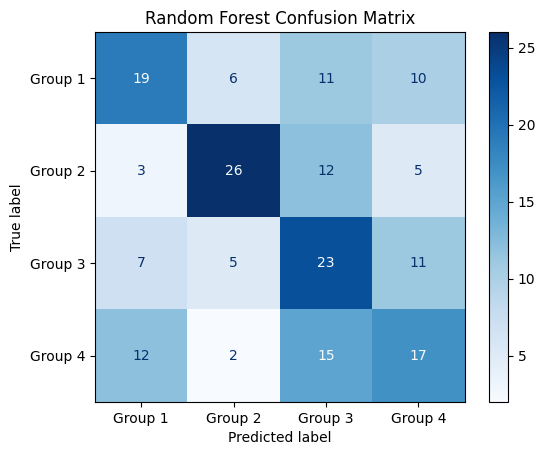

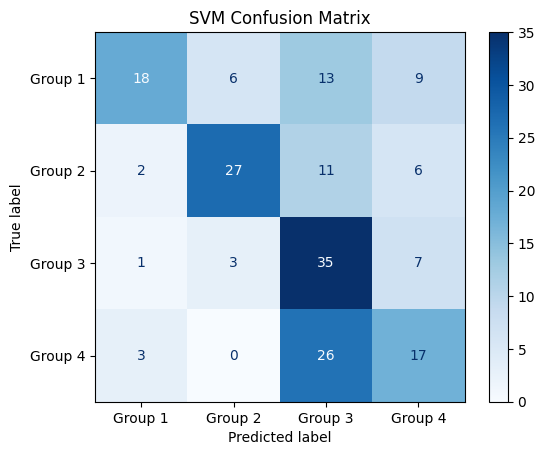

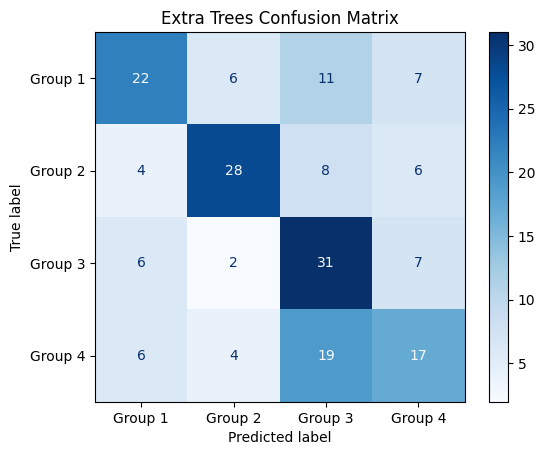

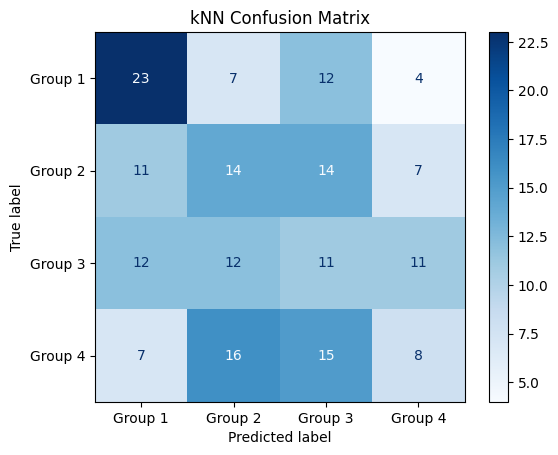

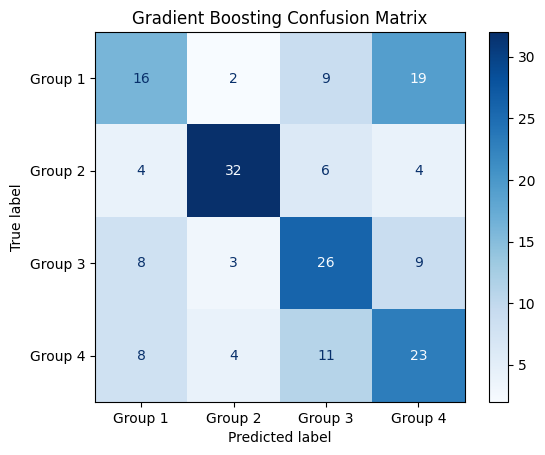

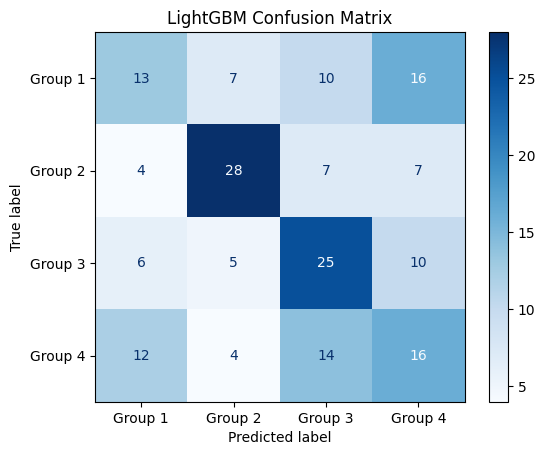

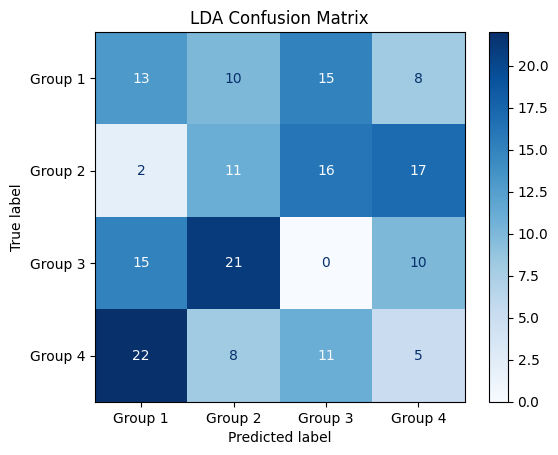

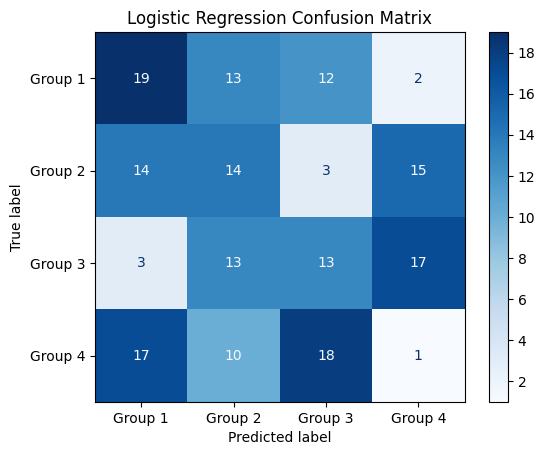

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have the true labels and predictions for each classifier stored in the following variables:
# y_true_rf, y_pred_rf
# y_true_svm, y_pred_svm
# y_true_et, y_pred_et
# y_true_knn, y_pred_knn
# y_true_gbc, y_pred_gbc
# y_true_lgbm, y_pred_lgbm
# y_true_lda, y_pred_lda
# y_true_logreg, y_pred_logreg

# y_true_rf2_all, y_pred_rf2_all
# y_true_svm2_all,  y_pred_svm2_all
# y_true_et_all, y_pred_et_all
# y_true_knn_all, y_pred_knn_all
# y_true_all_gbc, y_pred_all_gbc
# y_true_all_lgbm, y_pred_all_lgbm
# y_true_all_ldar, y_pred_all_ldar_reversed
# y_true_all_logreg, y_pred_lg_flipped

# Define the class labels
class_labels = le.classes_

# Function to display confusion matrix
def display_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Display confusion matrices for each classifier
display_confusion_matrix(y_true_rf2_all, y_pred_rf2_all, 'Random Forest Confusion Matrix')
display_confusion_matrix(y_true_svm2_all,  y_pred_svm2_all, 'SVM Confusion Matrix')
display_confusion_matrix(y_true_et_all, y_pred_et_all, 'Extra Trees Confusion Matrix')
display_confusion_matrix(y_true_knn_all, y_pred_knn_all, 'kNN Confusion Matrix')
display_confusion_matrix(y_true_all_gbc, y_pred_all_gbc, 'Gradient Boosting Confusion Matrix')
display_confusion_matrix(y_true_all_lgbm, y_pred_all_lgbm, 'LightGBM Confusion Matrix')
display_confusion_matrix(y_true_all_ldar, y_pred_all_ldar, 'LDA Confusion Matrix')
display_confusion_matrix(y_true_all_logregr, y_pred_all_logregr, 'Logistic Regression Confusion Matrix')


Displaying Confusion Matrices as Text Tables

In [25]:
# Function to display confusion matrix as a text table
def display_confusion_matrix_text(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    print(title)
    print(df_cm)
    print()

# Display confusion matrices for each classifier as text tables
display_confusion_matrix_text(y_true_rf2_all, y_pred_rf2_all, 'Random Forest Confusion Matrix')
display_confusion_matrix_text(y_true_svm2_all,  y_pred_svm2_all, 'SVM Confusion Matrix')
display_confusion_matrix_text(y_true_et_all, y_pred_et_all, 'Extra Trees Confusion Matrix')
display_confusion_matrix_text(y_true_knn_all, y_pred_knn_all, 'kNN Confusion Matrix')
display_confusion_matrix_text(y_true_all_gbc, y_pred_all_gbc, 'Gradient Boosting Confusion Matrix')
display_confusion_matrix_text(y_true_all_lgbm, y_pred_all_lgbm, 'LightGBM Confusion Matrix')
display_confusion_matrix_text(y_true_all_ldar, y_pred_all_ldar, 'LDA Confusion Matrix')
display_confusion_matrix_text(y_true_all_logreg, y_pred_all_logregr, 'Logistic Regression Confusion Matrix')


Random Forest Confusion Matrix
         Group 1  Group 2  Group 3  Group 4
Group 1       19        6       11       10
Group 2        3       26       12        5
Group 3        7        5       23       11
Group 4       12        2       15       17

SVM Confusion Matrix
         Group 1  Group 2  Group 3  Group 4
Group 1       18        6       13        9
Group 2        2       27       11        6
Group 3        1        3       35        7
Group 4        3        0       26       17

Extra Trees Confusion Matrix
         Group 1  Group 2  Group 3  Group 4
Group 1       22        6       11        7
Group 2        4       28        8        6
Group 3        6        2       31        7
Group 4        6        4       19       17

kNN Confusion Matrix
         Group 1  Group 2  Group 3  Group 4
Group 1       23        7       12        4
Group 2       11       14       14        7
Group 3       12       12       11       11
Group 4        7       16       15        8

Gradient Boost

Classification Report

In [26]:
from sklearn.metrics import classification_report

# Assuming you have these classification reports stored
# classification_report_rf = ...
# classification_report_svm = ...
# classification_report_et = ...
# classification_report_knn = ...
# classification_report_gbc = ...
# classification_report_lgbm = ...
# classification_report_lda = ...
# classification_report_logreg = ...

# Function to display classification report
def display_classification_report(report, model_name):
    print(f"Classification Report for {model_name}")
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"Class: {label}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{label}: {metrics}")
        print()

# Call the function for each classifier
display_classification_report(report_rf_logo, "Random Forest")
display_classification_report(report_svm1_logo, "SVM")
display_classification_report(report_et_logo, "Extra Trees")
display_classification_report(report_knn_logo, "k-Nearest Neighbors")
display_classification_report(report_gbc_logo, "Gradient Boosting Classifier")
display_classification_report(report_lgbm_logo, "LightGBM")
display_classification_report(report_ldar_logo, "Linear Discriminant Analysis")
display_classification_report(report_logregr, "Logistic Regression")


Classification Report for Random Forest
Class: Group 1
precision: 0.4634146341463415
recall: 0.41304347826086957
f1-score: 0.4367816091954023
support: 46.0

Class: Group 2
precision: 0.6666666666666666
recall: 0.5652173913043478
f1-score: 0.611764705882353
support: 46.0

Class: Group 3
precision: 0.3770491803278688
recall: 0.5
f1-score: 0.42990654205607476
support: 46.0

Class: Group 4
precision: 0.3953488372093023
recall: 0.3695652173913043
f1-score: 0.38202247191011235
support: 46.0

accuracy: 0.46195652173913043

Class: macro avg
precision: 0.47561982958754484
recall: 0.4619565217391304
f1-score: 0.46511883226098566
support: 184.0

Class: weighted avg
precision: 0.4756198295875448
recall: 0.46195652173913043
f1-score: 0.4651188322609856
support: 184.0

Classification Report for SVM
Class: Group 1
precision: 0.75
recall: 0.391304347826087
f1-score: 0.5142857142857142
support: 46.0

Class: Group 2
precision: 0.75
recall: 0.5869565217391305
f1-score: 0.6585365853658537
support: 46.0

C